# Atividade sobre regressão linear

Nesta atividade, você deve utilizar os dados de incêncios no Brasil, mas agora para prever a quantidade de incêncios ao invés de se foi acima da mediana.

In [40]:
import pandas as pd
#Mudanças#
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap
#Mudanças

incendios_br = pd.read_csv("https://orionwinter.github.io/datasets/forest_fires_in_brazil.csv")

incendios_br.head()

,year,state,month,number
0,1998,Acre,1,0.0
1,1999,Acre,1,0.0
2,2000,Acre,1,0.0
3,2001,Acre,1,0.0
4,2002,Acre,1,0.0


In [68]:
qte_estado = incendios_br.groupby(
    ["year"]
).agg(
    {"number": "sum"}
).rename(
    columns={"number": "qte_incendios"}
)

qte_estado#.head()

,qte_incendios
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600
2003,42760.674
2004,38453.163
2005,35004.965
2006,33832.161


In [73]:
incendios_br_proc = incendios_br.merge(
    qte_estado, on=["year"]
).drop(columns=["state","month","number"]).drop_duplicates()

incendios_br_proc.head()

,year,qte_incendios
0,1998,20013.971
324,1999,26882.821
648,2000,27351.251
972,2001,29071.612
1296,2002,37390.600


Como de costume, vamos separar nosso conjunto de treinamento e teste na proporção 80%/20% respectivamente. 

In [76]:
X = incendios_br_proc.loc[:, 'year'].values.reshape(-1,1)
X[:5]


array([[1998],
       [1999],
       [2000],
       [2001],
       [2002]])

In [75]:
y = incendios_br_proc.loc[:, 'qte_incendios'].values.reshape(-1,1)
y[:5]

array([[20013.971],
       [26882.821],
       [27351.251],
       [29071.612],
       [37390.6  ]])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

## Agora é sua vez

Para prever os valores, você deve utilizar uma regressão linear simples.
Em seguida, compute verifique a efetividade do modelo através do RMSE e explique se o modelo teve uma boa efetividade.

In [0]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

# Função que gera o gráfico dos resultados de regressão
def plot_results_linear(X, y, regressor, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Qte Incêndios')
    plt.show()

In [79]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred = regressor.predict(X_test)

y_pred

array([[31931.34539496],
       [38944.80309923],
       [38119.69042814],
       [32343.90173051]])

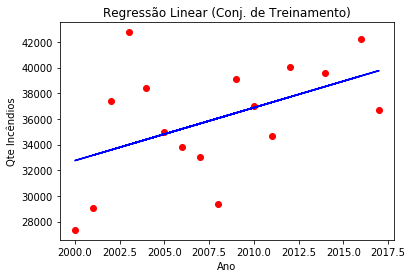

In [84]:
plot_results_linear(X_train, y_train, regressor, 'Regressão Linear (Conj. de Treinamento)')

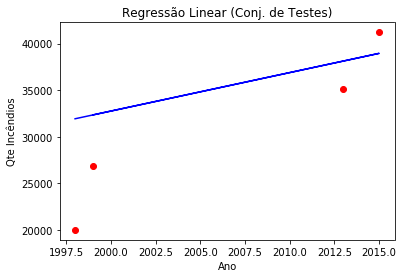

In [85]:
plot_results_linear(X_test, y_test, regressor, 'Regressão Linear (Conj. de Testes)')

R²

In [86]:
regressor.score(X_test, y_test)

0.2823084896811259

RMSE

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

6815.657162081862

Como o enunciado pedia para tentar predizer a quantidade de incêndios no Brasil, decidi utilizar a soma das queimadas por ano. Como era esperado, a regressão linear não é um bom método de classificação, pois com ele não é possivel utilizar muitas váriaveis independentes. Talvez utilizando outras variaveis como o estado e mês, a acuracia do modelo melhorasse um pouco. 

Ao avaliar o modelo utilizando o RMSE, vemos que o erro é bem alto. Isto também pode ser obversado olhando o R².